In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, f1_score, classification_report, plot_roc_curve

In [2]:
# import sys
# !{sys.executable} -m pip install xgboost

In [3]:
from pathlib import Path
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().home() / 'Desktop\Master_folder\Python\Jupyter_notebook\Datasets'

In [4]:
Student_performance = DATA / 'StudentsPerformance.csv'

In [5]:
df = pd.read_csv(Student_performance)

In [6]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.groupby(['gender', 'lunch'])['math score'].mean()

gender  lunch       
female  free/reduced    55.814815
        standard        68.124620
male    free/reduced    62.457831
        standard        72.022152
Name: math score, dtype: float64

In [ ]:
df.pivot

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
degree = []

for d in df['parental level of education']:
    if d == "bachelor's degree" or d == "master's degree" or d == "associate's degree":
        degree.append('yes')
    else:
        degree.append('No')
df['degree comp'] = degree 


In [10]:
df['degree comp'].value_counts()

No     601
yes    399
Name: degree comp, dtype: int64

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
# Examining how many students pass the exam
passmark = 50

In [11]:
df['math_pass_status'] = np.where(df['math score'] < passmark, 'F', 'P')
df['reading_pass_status'] = np.where(df['math score'] < passmark, 'F', 'P')
df['writing_pass_status'] = np.where(df['writing score']< passmark, 'F', 'P')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pass_status,reading_pass_status,writing_pass_status
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,F
4,male,group C,some college,standard,none,76,78,75,P,P,P
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P
998,female,group D,some college,standard,completed,68,78,77,P,P,P


In [12]:
# df.math_pass_status.value_counts()
# df.writing_pass_status.value_counts()
df.reading_pass_status.value_counts()

P    865
F    135
Name: reading_pass_status, dtype: int64

matplotlib supports the use of setp() ("set property") and getp() to set and get object properties, as well as to do introspection on the object. For example, to set the linestyle of a line to be dashed, you can do:

#annotate bar plot with values
for i, y in enumerate(ax.patches):
    label_per = percents[i]
    ax.text(y.get_width()+.09, y.get_y()+.3, str(round((y.get_width()), 1)), fontsize=10)
    # add the percent label here
    # ax.text(y.get_width()+.09, y.get_y()+.3, str(round((label_per), 2)), ha='right', va='center', fontsize=10)
    ax.text(y.get_width()+.09, y.get_y()+.1, str(f'{round((label_per), 2)}%'), fontsize=10)
    
    #             for i, v in df.reset_index().iterrows():
#                 plt.text(i, v.y + 0.2 , v.y, color='red')
            

        # assign your bars to a variable so their attributes can be accessed
bars = plt.bar(x, height=y, width=.4)

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

### think of ways to get height

In [13]:
def pass_or_failed(df):
    lst = ['math_pass_status', 'reading_pass_status', 'writing_pass_status']
    col = ['race/ethnicity', 'parental level of education']
    
    for x in lst:
        for y in col:
            plt.figure(figsize=(6,6))
            p = sns.countplot(x=y, data = df, hue= x, palette='bright')
            plt.setp(p.get_xticklabels(), rotation=90)
            plt.legend(loc='best')
            plt.title(x)
                        
            plt.tight_layout()
            plt.show();


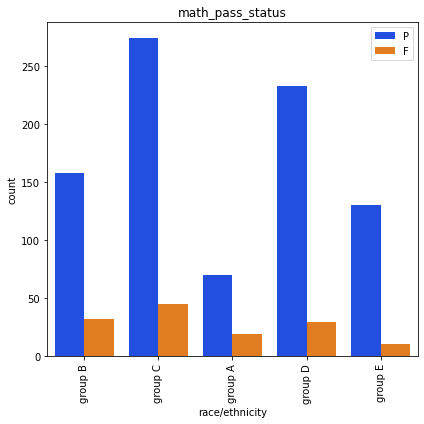

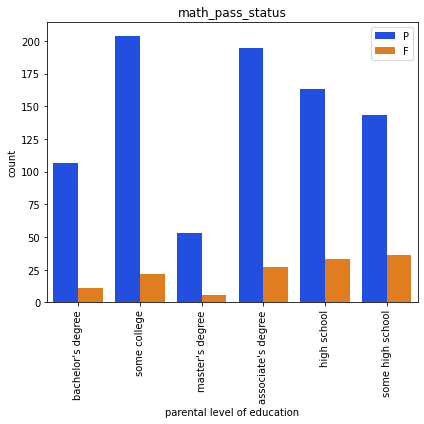

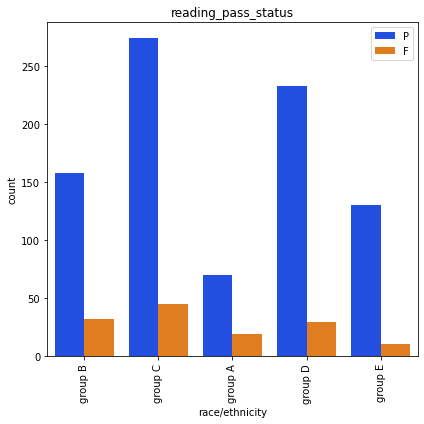

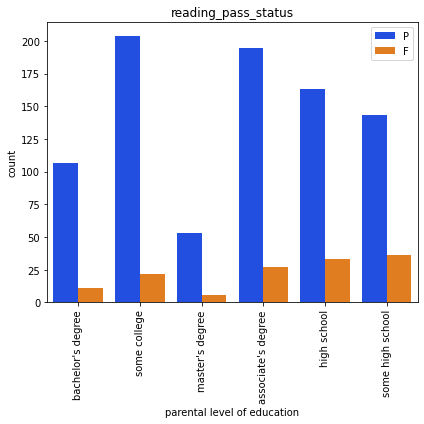

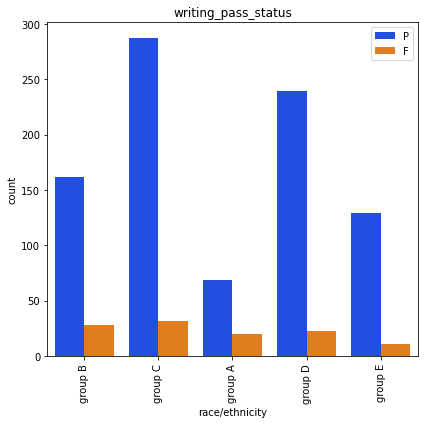

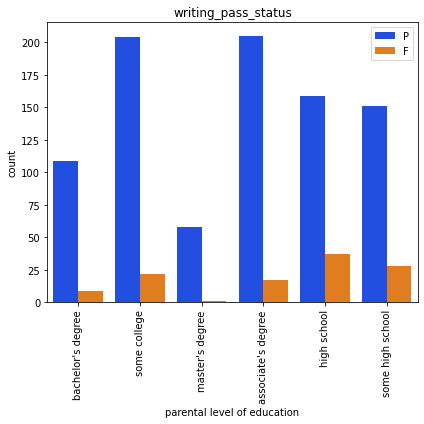

In [14]:
pass_or_failed(df)

In [15]:
df['pass_all_exams'] = df.apply(lambda x : 'F' 
                                if x['math_pass_status'] == 'F' or
                                   x['reading_pass_status'] == 'F' or
                                   x['writing_pass_status'] == 'F' else
                                'P', axis=1)
df.pass_all_exams.value_counts()

P    820
F    180
Name: pass_all_exams, dtype: int64

In [16]:
def pass_all_exams(df):
    lst = ['pass_all_exams']
    col = ['race/ethnicity', 'parental level of education']
    
    for x in lst:
        for y in col:
            plt.figure(figsize=(6,6))
            p = sns.countplot(x=y, data = df, hue= x, palette='bright')
            plt.setp(p.get_xticklabels(), rotation=90)
            plt.legend(loc='best')
            plt.title(x)
                        
            plt.tight_layout()
            plt.show();


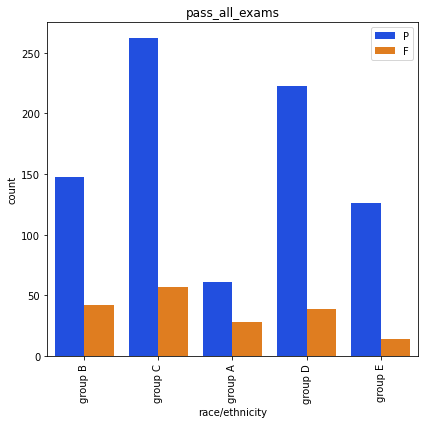

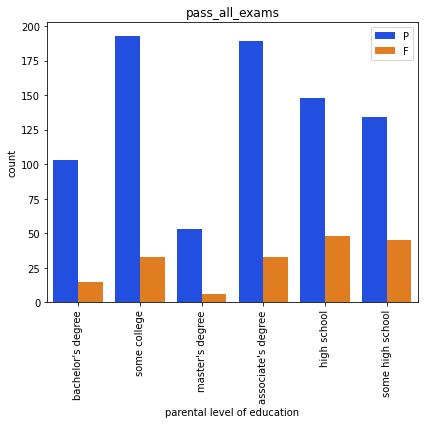

In [17]:
pass_all_exams(df)

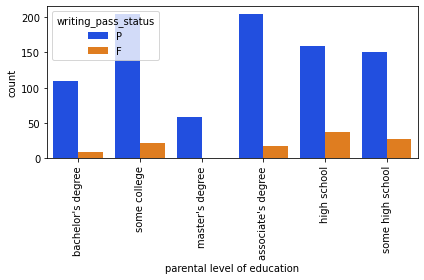

In [18]:
p = sns.countplot(x='parental level of education', data=df, hue='writing_pass_status', palette='bright')

plt.setp(p.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [19]:
df['pass_all_exams'] = df.apply(lambda x : 'F' 
                                if x['math_pass_status'] == 'F' or
                                   x['reading_pass_status'] == 'F' or
                                   x['writing_pass_status'] == 'F' else
                                'P', axis=1)
df.pass_all_exams.value_counts()


P    820
F    180
Name: pass_all_exams, dtype: int64

In [20]:
df['overall_pct'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

df['letter grade'] = [x for x in df['overall_pct']
    if ( overall_pct >= 80 ):
        return 'A'
    if ( overall_pct >= 70):
        return 'B'
    if ( overall_pct >= 60):
        return 'C'
    if ( overall_pct >= 50):
        return 'D'
    if ( overall_pct >= 40):
        return 'E'
    else: 
        return 'F']


SyntaxError: invalid syntax (<ipython-input-20-577a05edb86b>, line 4)

In [ ]:
# Generate result using pandas 
result = [] 
for value in df["Marks"]: 
    if value >= 33: 
        result.append("Pass") 
    elif value < 0 and value > 100: 
        result.append("Invalid") 
    else: 
        result.append("Fail") 
       
df["Result"] = result    
print(df) 

In [ ]:
result = [] 
for x in df['overall_pct']:
    if x >= 90:
        result.append('A')
    if x >= 80 and x < 90:
        result.append('B')
    if x >= 70 and x < 80:
        result.append('C')
    if x >= 60 and x < 70:
        result.append('D')
    if x < 60:
        result.append('F')
len(result)
# len(df['overall_pct'])
df['grade'] = result

In [ ]:
df.grade.value_counts()

In [ ]:
sns.countplot(x='grade', data=df, palette='bright', order=['A', 'B', 'C', 'D', 'F'])
plt.tight_layout()
plt.show()


In [ ]:
def grade(df):
    lst = ['grade']
    col = ['race/ethnicity', 'parental level of education', 'test preparation course values']
    
    for x in lst:
        for y in col:
            plt.figure(figsize=(6,6))
            p = sns.countplot(x=y, data = df, hue= x, palette='bright')
            plt.setp(p.get_xticklabels(), rotation=90)
            plt.legend(loc='best')
            plt.title(x)
                        
            plt.tight_layout()
            plt.show();

In [21]:
df['test preparation course']

0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test preparation course, Length: 1000, dtype: object

ValueError: Could not interpret input 'grade'

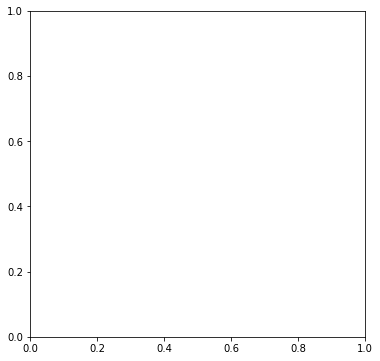

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(x='grade', data=df, hue='test preparation course', palette='bright', orient='h')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

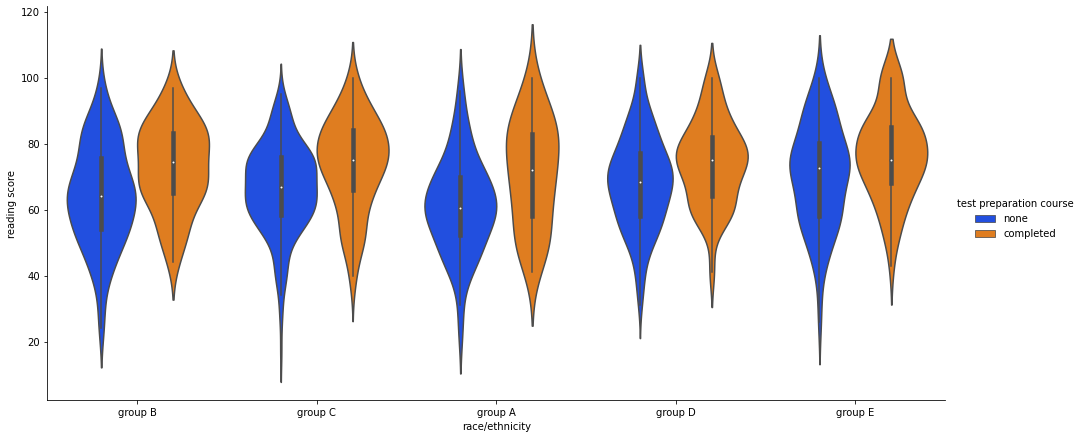

In [23]:
sns.catplot(x='race/ethnicity', y = 'reading score', data=df,
            hue='test preparation course', palette='bright', kind='violin',
           height=6, aspect=2.20)

ValueError: Could not interpret input 'grade'

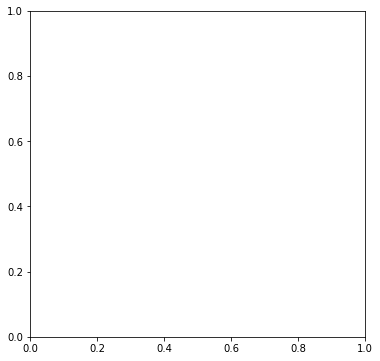

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(y='grade', data=df, hue='test preparation course',
                   palette='Set3', orient='v', order=['A', 'B', 'C', 'D', 'F'])
ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(y='grade', data=df, hue='test preparation course',
                   edgecolor=sns.color_palette("dark", 3), orient='v', order=['A', 'B', 'C', 'D', 'F'])
ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
sns.catplot(y='grade', hue= 'test preparation course', col='lunch', data=df, 
           kind='count', height=8, aspect=.8, order= ['A', 'B', 'C', 'D', 'F'], legend=False)

plt.legend(loc=2)
plt.tight_layout()
plt.show()


# there is difference in the count when it comes test preparation which is skewing the average. if we added more samples maybe it would show us a different number


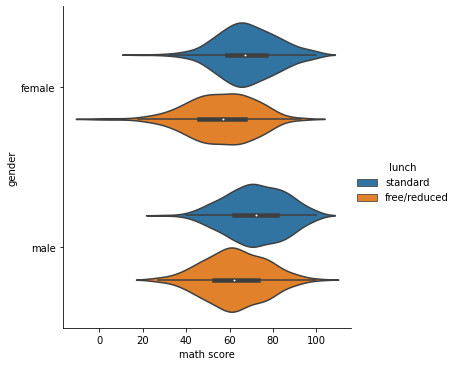

In [25]:
sns.catplot(x='math score', y='gender', hue='lunch', data = df, kind='violin' )

In [26]:
sns.catplot(x='math score', y='grade', col='test preparation course', hue='lunch', data = df, kind='violin')

ValueError: Could not interpret input 'grade'

In [27]:
ax = sns.violinplot(x='math score', y='grade', data = df, inner=None, color=".8")
ax= sns.stripplot(x='math score', y='grade', data = df)

ValueError: Could not interpret input 'grade'

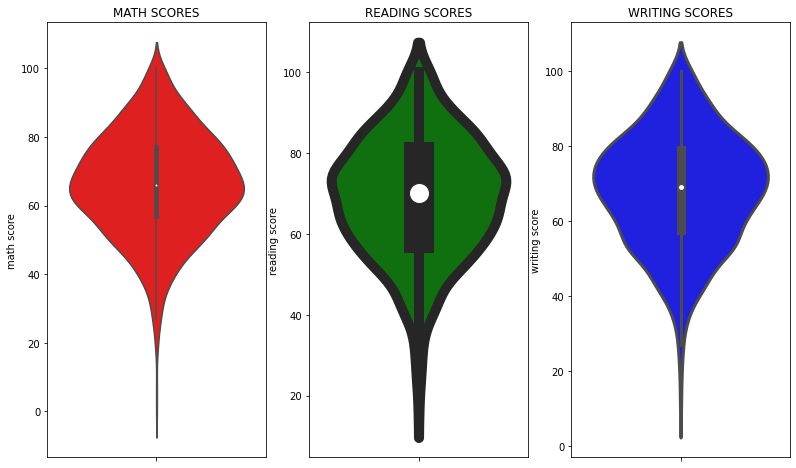

In [28]:
plt.rcParams['axes.facecolor'] = "white"
plt.rcParams['figure.facecolor'] ="white"
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red')
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=10)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

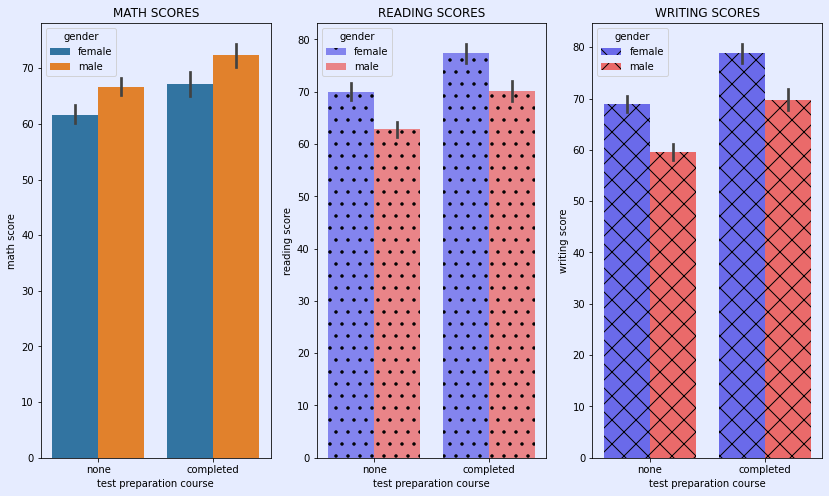

In [29]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',)
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='seismic',**{'hatch':'.','alpha':0.8,'linewidth':2})
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='seismic',**{'hatch':'x','linewidth':2})
plt.title('WRITING SCORES')
plt.show()

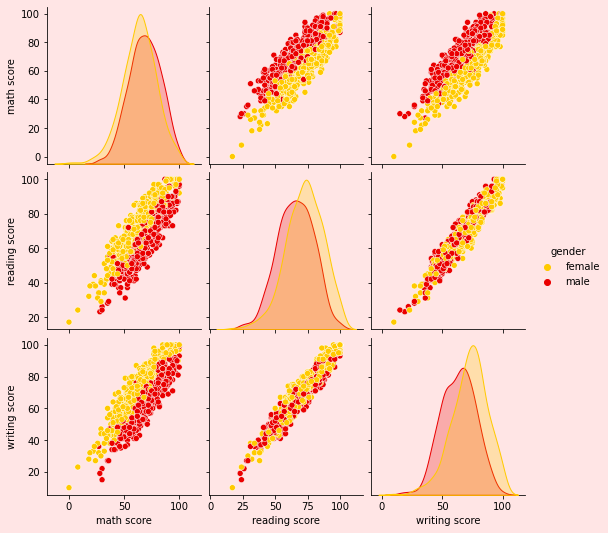

In [30]:
plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"
sns.pairplot(data=df,hue='gender',palette='hot_r')

In [523]:
df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pass_status,reading_pass_status,writing_pass_status,pass_all_exams,overall_pct,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,F,F,49.333333,F


In [9]:
for col in df.columns:
    print(f'data ***{col} values***:\n ')
    print(f'{df[col].value_counts()}\n')

data ***gender values***:
 
female    518
male      482
Name: gender, dtype: int64

data ***race/ethnicity values***:
 
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

data ***parental level of education values***:
 
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

data ***lunch values***:
 
standard        645
free/reduced    355
Name: lunch, dtype: int64

data ***test preparation course values***:
 
none         642
completed    358
Name: test preparation course, dtype: int64

data ***math score values***:
 
65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

data ***reading score values***:
 
72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23    

In [11]:
def count_plot(df):
    column_list = df.columns.to_list()
    column_list = column_list[0:4]
    for col in column_list:
        total = float(len(df[column_list[0]]))
        plt.figure(figsize=(5,5))
        sns.set(style='darkgrid')
        ax = sns.countplot(x=df[col]) # make sure you have an x if not you will get an error in the future
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2.,height + 3, '{:.2f}'.format(height/total),ha='center')
        plt.title('Counts', fontsize = 20)
        plt.tight_layout()
        plt.show()

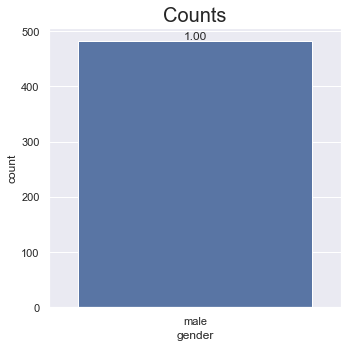

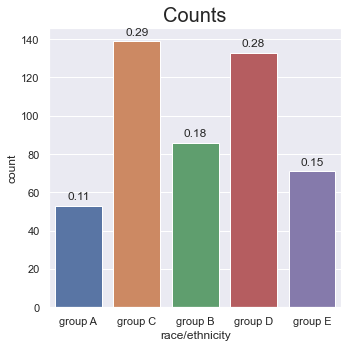

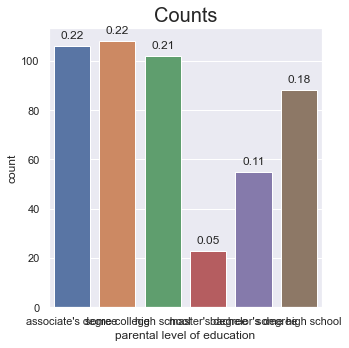

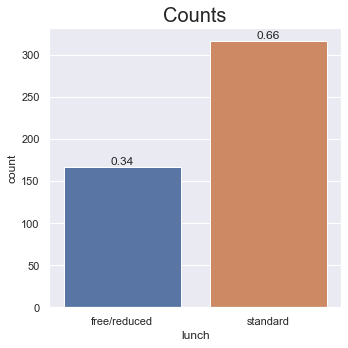

In [12]:
count_plot(df[df['gender'] == 'male'])

In [13]:
(df[df['test preparation course'] == 'completed'].mean().sum()) / 3

72.66945996275605

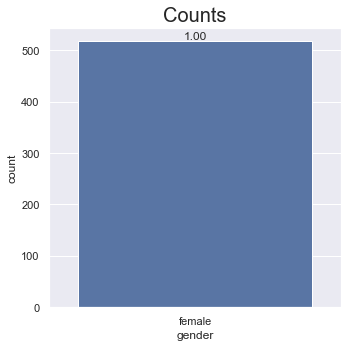

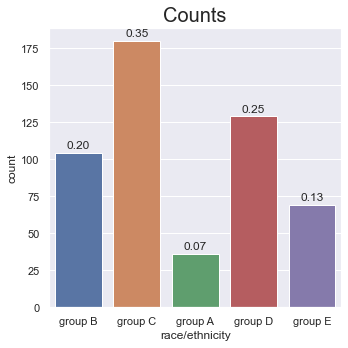

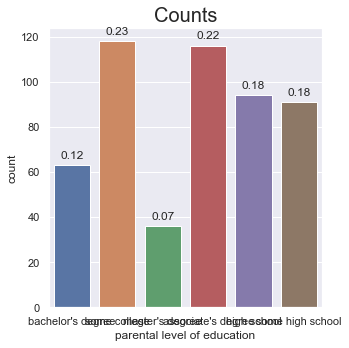

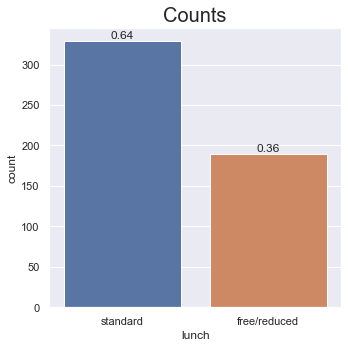

In [14]:
count_plot(df[df['gender'] == 'female'])

In [15]:
def hist_plots_score(df):
    for col in df.columns[5:]:
        plt.figure()
        plt.hist(df[col], bins=15)
        plt.title(f'{col}')
        plt.tight_layout
        plt.xlabel('grade score')
        plt.ylabel('frequency')
        plt.show()

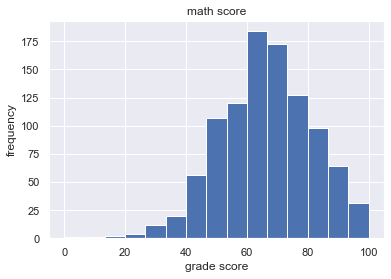

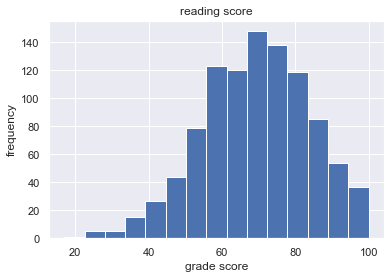

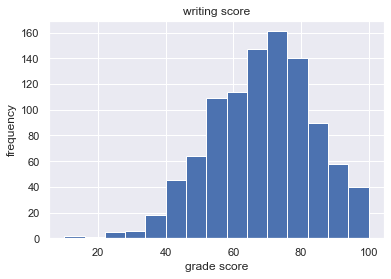

In [16]:
hist_plots_score(df)

In [17]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [18]:
df[df['math score'] < 20] 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
787,female,group B,some college,standard,none,19,38,32
980,female,group B,high school,free/reduced,none,8,24,23


In [19]:
X = pd.get_dummies(df, columns=['parental level of education', 'lunch','test preparation course', 'gender','race/ethnicity' ]
                   , prefix=['parent education', 'lunch_', 'test_pre', 'Sex', 'group'])

In [20]:
X.corr()

,math score,reading score,writing score,parent education_associate's degree,parent education_bachelor's degree,parent education_high school,parent education_master's degree,parent education_some college,parent education_some high school,lunch__free/reduced,lunch__standard,test_pre_completed,test_pre_none,Sex_female,Sex_male,group_group A,group_group B,group_group C,group_group D,group_group E
math score,1.000000,0.817580,0.802642,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.350877,0.350877,0.177702,-0.177702,-0.167982,0.167982,-0.091977,-0.084250,-0.073387,0.050071,0.205855
reading score,0.817580,1.000000,0.954598,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780,0.244313,-0.244313,-0.096274,-0.060283,-0.003074,0.035177,0.106712
writing score,0.802642,0.954598,1.000000,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946,0.301225,-0.301225,-0.110714,-0.078254,-0.010203,0.082032,0.089077
parent education_associate's degree,0.063228,0.064386,0.064799,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.009102,0.009102,0.012668,-0.012668,0.004835,-0.004835,-0.048658,-0.007238,0.037077,-0.044674,0.054922
parent education_bachelor's degree,0.079664,0.096024,0.128297,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,0.013668,-0.013668,0.024285,-0.024285,0.011638,-0.011638,0.016307,-0.019121,0.015682,-0.020556,0.013221
parent education_high school,-0.128725,-0.151068,-0.182211,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,0.002211,-0.002211,-0.074446,0.074446,-0.037952,0.037952,0.004919,0.069093,0.007977,-0.042118,-0.039494
parent education_master's degree,0.060417,0.106452,0.125693,-0.133757,-0.091588,-0.123632,1.000000,-0.135305,-0.116919,0.027095,-0.027095,-0.009933,0.009933,0.046188,-0.046188,-0.033551,-0.056363,0.001630,0.072793,-0.003180
parent education_some college,0.037056,0.010782,0.027989,-0.288649,-0.197647,-0.266799,-0.135305,1.000000,-0.252312,-0.006146,0.006146,-0.019490,0.019490,0.004460,-0.004460,-0.017751,-0.036203,-0.015872,0.042347,0.023153
parent education_some high school,-0.079852,-0.071369,-0.097326,-0.249426,-0.170790,-0.230545,-0.116919,-0.252312,1.000000,-0.013874,0.013874,0.070289,-0.070289,-0.008990,0.008990,0.073921,0.026531,-0.045339,0.018402,-0.053075
lunch__free/reduced,-0.350877,-0.229560,-0.245769,-0.009102,0.013668,0.002211,0.027095,-0.006146,-0.013874,1.000000,-1.000000,0.017044,-0.017044,0.021372,-0.021372,0.032329,0.008257,0.003385,0.009458,-0.052398


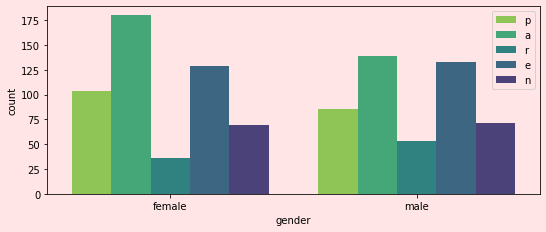

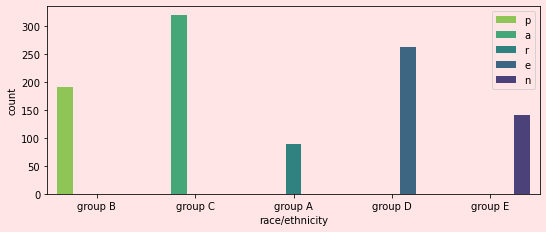

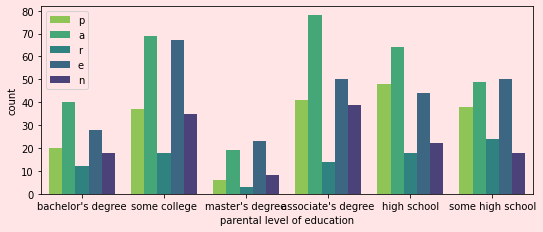

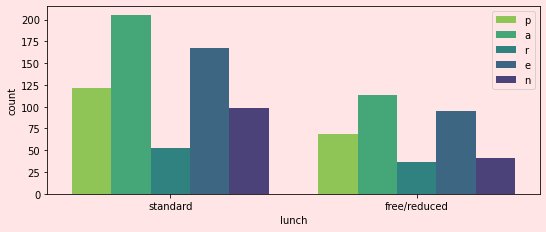

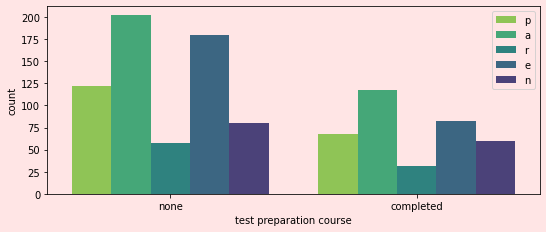

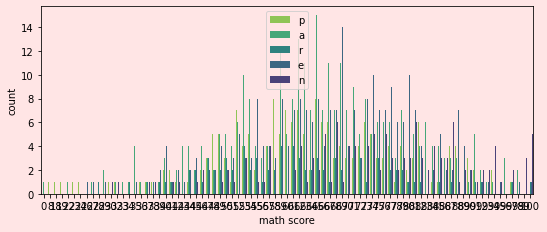

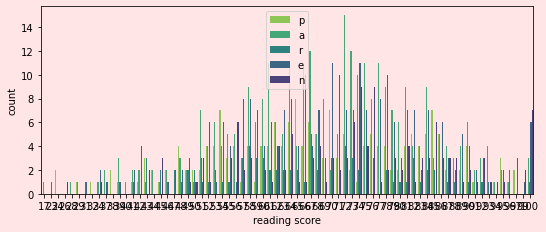

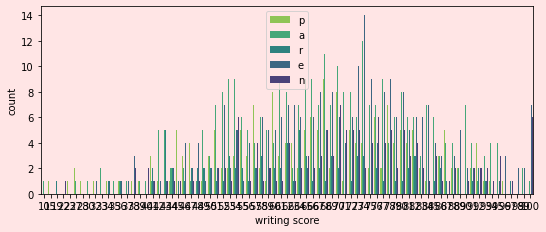

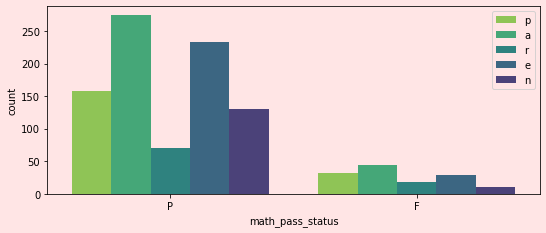

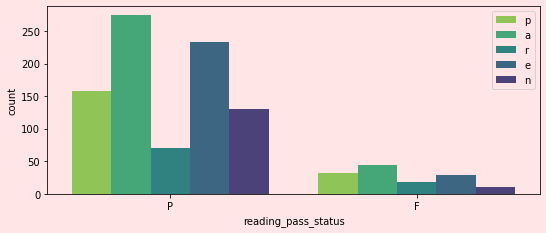

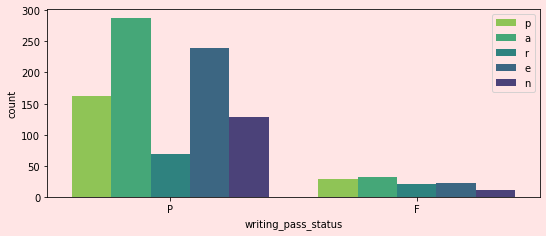

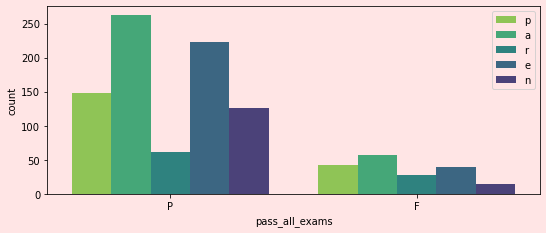

In [39]:
for col in df.columns:
    plt.figure(figsize=(30,20))
    plt.subplot(5,3,1)
    sns.countplot(x=col, hue='race/ethnicity', data=df, palette='viridis_r')
    plt.legend('parental level of education')

In [41]:
df.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pass_status,reading_pass_status,writing_pass_status,pass_all_exams
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,F,F


In [42]:
df.loc[(df['parental level of education'] == "bachelor's degree") & (df['test preparation course'] == 'completed')].median()

math score       72.5
reading score    75.0
writing score    79.5
dtype: float64

In [43]:
df.loc[(df['parental level of education'] == "bachelor's degree") & (df['test preparation course'] == 'none')].median()

math score       65.5
reading score    72.0
writing score    70.0
dtype: float64

In [44]:
df['parental level of education'].value_counts()
degree = ['some college', "associate's degree", 'high school', 'some high school', "master's degree", "bachelor's degree"]

In [45]:
def test_prep_vs_no_test_prep(df, key):
#     degree = ['some college', "associate's degree", 'high school', 'some high school', "master's degree", "bachelor's degree"]
    
    a = df.loc[(df['parental level of education'] == key) & 
                        (df['test preparation course'] == 'completed')].mean()
    b = df.loc[(df['parental level of education'] == key) & 
               (df['test preparation course'] == 'none')].mean()
    return a, b

In [46]:
a= test_prep_vs_no_test_prep(df, "associate's degree")
a = pd.DataFrame(a)
a

,math score,reading score,writing score
0,71.829268,76.170732,76.817073
1,65.571429,67.857143,65.842857


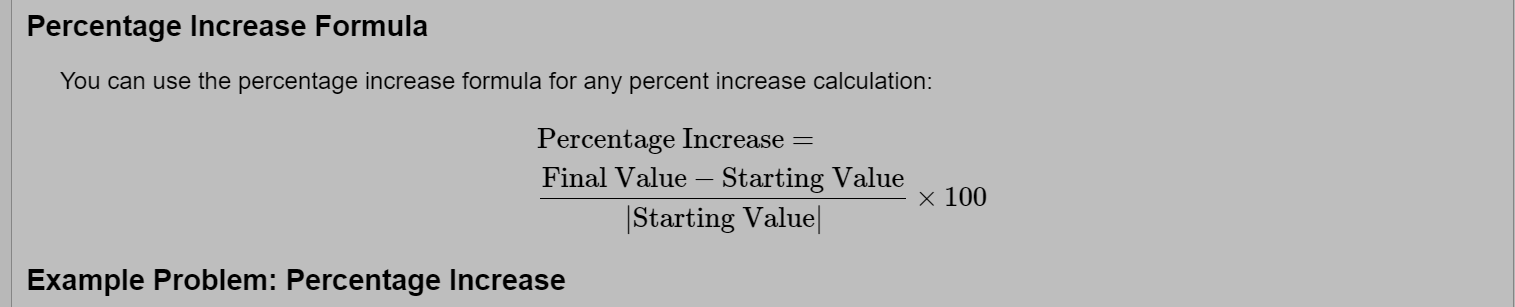

In [47]:
((72 - 66) / 66) * 100

9.090909090909092

In [48]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_pass_status,reading_pass_status,writing_pass_status,pass_all_exams
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,F,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,P
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,P
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,P
998,female,group D,some college,standard,completed,68,78,77,P,P,P,P


In [49]:
from sklearn.metrics import mean_absolute_error
np.random.seed(42)
X = df.drop(columns=['writing score'], axis=1)
y = df['writing score']
X = pd.get_dummies(X, prefix=['gender','ethnicity', 'education', 'lunch','prep'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

rfg = RandomForestRegressor().fit(X_train, y_train)

# rfg.score(X_test,y_test)
rfg_predict = rfg.predict(X_test)
# rfg_predict[:5]
rfg_predic_mean = rfg_predict.mean()
# rfg_predic_mean
mean_absolute_error(y_test, rfg_predict)

ValueError: Length of 'prefix' (5) did not match the length of the columns being encoded (9).

In [50]:
rfg_predic_mean = rfg_predict.mean()
rfg_predic_mean

NameError: name 'rfg_predict' is not defined

In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

X = pd.get_dummies(X, prefix=['gender','ethnicity', 'education', 'lunch','prep'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
np.random.seed(42)
model = ElasticNet().fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)
# model.score(X_test, y_test)

ValueError: Length of 'prefix' (5) did not match the length of the columns being encoded (9).

In [52]:
model_mean = y_pred.mean()
model_mean

NameError: name 'y_pred' is not defined

In [34]:
from sklearn.linear_model import Ridge
np.random.seed(42)
X = df.drop(columns=['writing score'], axis=1)
y = df['writing score']

X = pd.get_dummies(X, prefix=['gender','ethnicity', 'education', 'lunch','prep'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

R = Ridge().fit(X_train, y_train)
# R.score(X_test, y_test)
R_predict = R.predict(X_test)
mean_absolute_error(y_test, R_predict)

3.2006699807442236

In [35]:
R_mean = R_predict.mean()
R_mean

66.5563620433645

# group by and predict by group ethnicity
### try predicting only on the groups to see which one gives the best accurate results
  - see if adding rows through resample increases accuracy

In [45]:
# df['overall average'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

In [149]:
# df = df.drop(columns='overall average', axis=1)

In [37]:
df.groupby(['race/ethnicity', 'parental level of education'])['overall average'].mean()

KeyError: 'Column not found: overall average'

In [7]:
def group(group):
    '''
    example 'group B'
    '''
    a =  df.loc[df['race/ethnicity'] == group]
    return a

In [8]:
group_a = group('group A')
group_b = group('group B')
group_c = group('group C')
group_d = group('group D')
group_e = group('group E')

group_lenghts = len(group_a), len(group_b), len(group_c), len(group_d), len(group_e)

race/ethnicity
group A    AxesSubplot(0.125,0.125;0.775x0.755)
group B    AxesSubplot(0.125,0.125;0.775x0.755)
group C    AxesSubplot(0.125,0.125;0.775x0.755)
group D    AxesSubplot(0.125,0.125;0.775x0.755)
group E    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

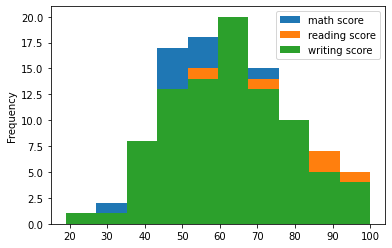

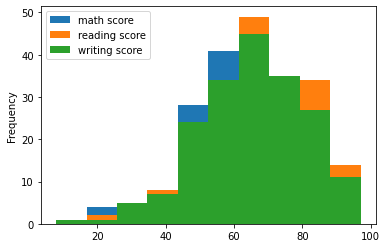

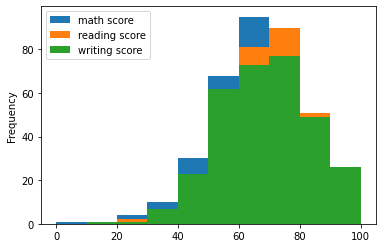

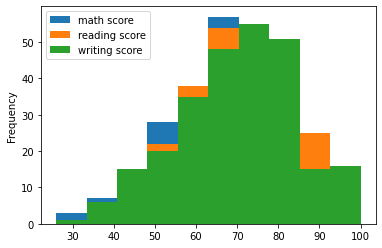

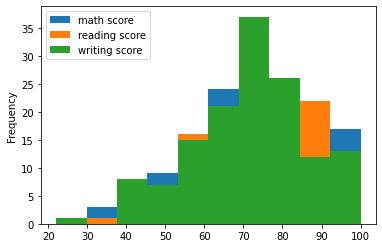

In [9]:
df.groupby('race/ethnicity').plot.hist()

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
ax = plt.hist(df.loc[(df['race/ethnicity'] == 'group A') & (df['math score'])]

SyntaxError: unexpected EOF while parsing (<ipython-input-10-31376bca2439>, line 2)

In [11]:
pd.crosstab(df['race/ethnicity'], df['gender'])

gender,female,male
race/ethnicity,,
group A,36,53
group B,104,86
group C,180,139
group D,129,133
group E,69,71


In [12]:
def plt_hist(df):
    for i in df.columns:
        plt.figure()
        plt.hist(df[i])
        plt.title(f'{i}')

In [13]:
df.iloc[:,5:]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


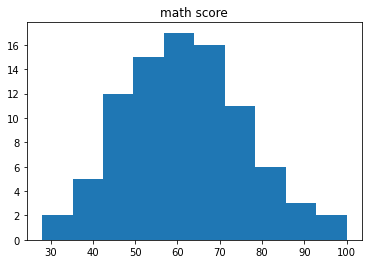

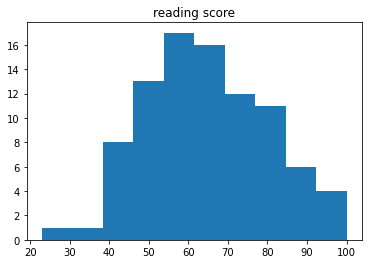

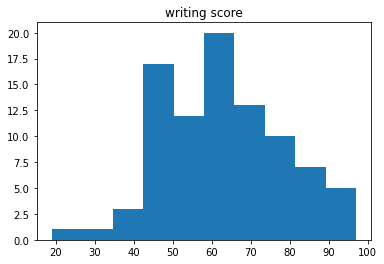

In [14]:
plt_hist(group_a.iloc[:,5:])

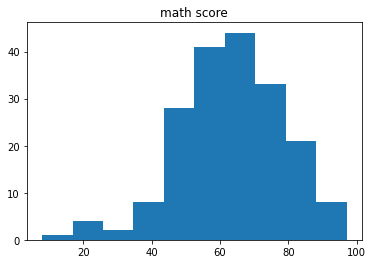

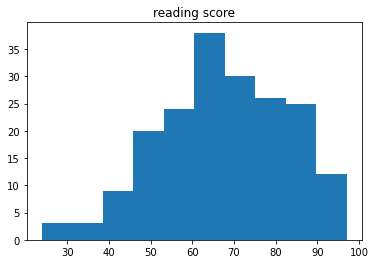

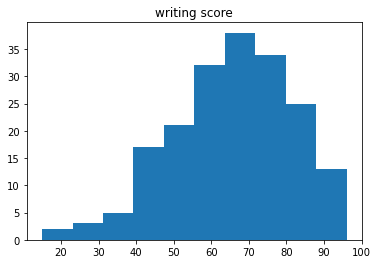

In [15]:
plt_hist(group_b.iloc[:,5:])

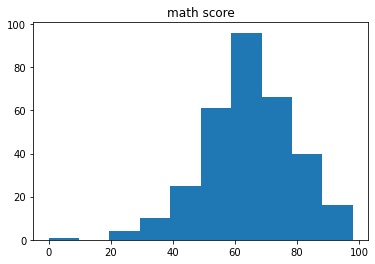

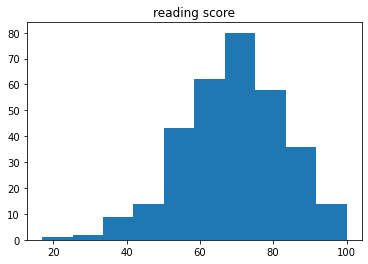

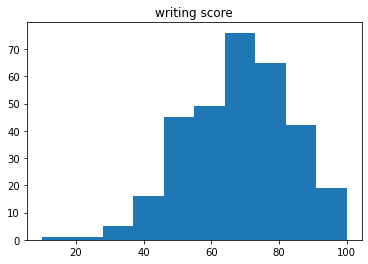

In [16]:
plt_hist(group_c.iloc[:,5:])

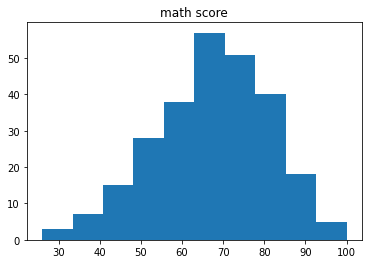

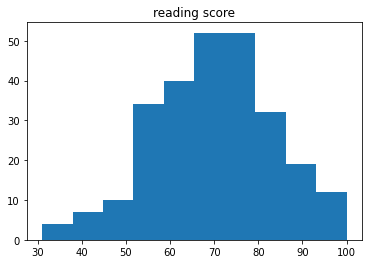

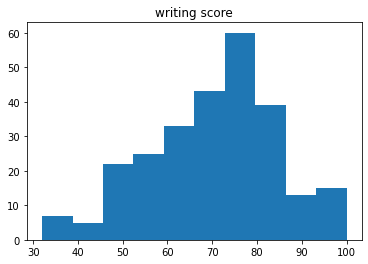

In [17]:
plt_hist(group_d.iloc[:,5:])

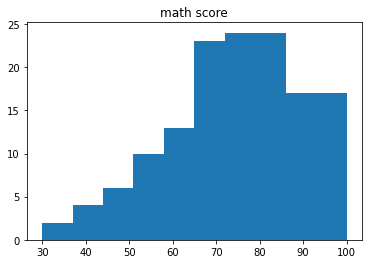

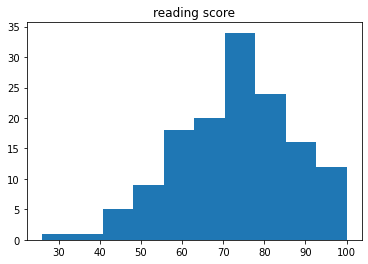

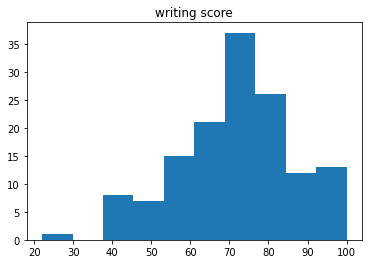

In [18]:
plt_hist(group_e.iloc[:,5:])

# lets predict based off the groups 

In [19]:
group_a

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
13,male,group A,some college,standard,completed,78,72,70
14,female,group A,master's degree,standard,none,50,53,58
25,male,group A,master's degree,free/reduced,none,73,74,72
46,female,group A,associate's degree,standard,completed,55,65,62
...,...,...,...,...,...,...,...,...
974,female,group A,some college,standard,none,54,63,67
983,female,group A,some college,standard,completed,78,87,91
985,male,group A,high school,standard,none,57,51,54
988,female,group A,some high school,free/reduced,none,44,45,45


In [20]:
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def pred_models(df, key):
    models = {
        'Random Forest': RandomForestRegressor(),
        'Rid': Ridge(),
        'El Net': ElasticNet(),
        'Lasso': LassoCV(),
        'Decison tree': DecisionTreeRegressor()
        
    }
    
    model_scores = {}
    
    np.random.seed(42)
    X = df.drop(columns=['race/ethnicity', key], axis=1)
    y = df[key]
    X = pd.get_dummies(data=X, prefix=['Sex', 'education', 'lunch', 'prep'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
    
    for key, values in models.items():
        values.fit(X_train, y_train)
        model_scores[key] = values.score(X_test, y_test)
    return model_scores
    

In [40]:
def pred_models(df):
    models = {
        'Random Forest': RandomForestRegressor(),
        'Rid': Ridge(),
        'El Net': ElasticNet(),
        'Lasso': LassoCV(),
        'Decison tree': DecisionTreeRegressor(),
        'Linear Reg': LinearRegression(),
        "Logistic Reg": LogisticRegression(),
        "XGB": XGBRegressor(max_depth = 6)
        
    }
    
    model_math_scores = {}
    model_reading_scores = {}
    model_writing_scores = {}
    
    np.random.seed(42)
    X = df.drop(columns=['race/ethnicity', 'math score', 'reading score', 'writing score'], axis=1)
    y = df['math score']
    X = pd.get_dummies(data=X, prefix=['Sex', 'education', 'lunch', 'prep'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
    
    for key, values in models.items():
        values.fit(X_train, y_train)
        model_math_scores[key] = values.score(X_test, y_test)

       
    
    X = df.drop(columns=['race/ethnicity', 'reading score', 'math score', 'writing score'], axis=1)
    y = df['reading score']
    X = pd.get_dummies(data=X, prefix=['Sex', 'education', 'lunch', 'prep'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
    
    for key, values in models.items():
        values.fit(X_train, y_train)
        model_reading_scores[key] = values.score(X_test, y_test)

    
   

    
    X = df.drop(columns=['race/ethnicity', 'writing score', 'reading score', 'math score'], axis=1)
    y = df['writing score']
    X = pd.get_dummies(data=X, prefix=['Sex', 'education', 'lunch', 'prep'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
    
    for key, values in models.items():
        values.fit(X_train, y_train)
        model_writing_scores[key] = values.score(X_test, y_test)
        
    return model_math_scores, model_reading_scores, model_writing_scores



In [41]:
def group_score_dataframe(df):
    math, reading, writing = pred_models(df)
    scores = pd.DataFrame(data=[math, reading, writing], index=['math pred', 'reading pred', 'writing pred'])
    return scores 

In [42]:
group_lenghts

(89, 190, 319, 262, 140)

In [45]:
group_a_df = group_score_dataframe(group_a)
group_a_df


,Random Forest,Rid,El Net,Lasso,Decison tree,Linear Reg,XGB
math pred,-0.298945,-0.388459,-0.203650,-0.316936,-0.346281,-0.415694,-0.352891
reading pred,-0.542900,-0.117776,0.007394,-0.072482,-1.214064,-0.138168,-1.312447
writing pred,-0.197365,-0.145966,-0.094013,-0.194860,-0.436360,-0.238038,-0.518137


In [46]:
group_b_df = group_score_dataframe(group_b)
group_b_df

,Random Forest,Rid,El Net,Lasso,Decison tree,Linear Reg,XGB
math pred,-0.292359,0.070018,0.084606,0.084512,-0.299625,0.056912,-0.298959
reading pred,-0.107111,0.000152,0.049762,0.006731,-0.103797,-0.014284,-0.078598
writing pred,0.160989,0.257584,0.091570,0.229736,0.089352,0.260355,0.145130


In [47]:
group_c_df = group_score_dataframe(group_c)
group_c_df

,Random Forest,Rid,El Net,Lasso,Decison tree,Linear Reg,XGB
math pred,0.157350,0.248699,0.119157,0.248640,0.148380,0.249405,0.148515
reading pred,-0.016931,0.167938,0.063902,0.162239,-0.026911,0.168267,-0.057216
writing pred,-0.052366,0.089847,0.120681,0.094729,-0.060989,0.082349,-0.048819


In [48]:
group_d_df = group_score_dataframe(group_d)
group_d_df

,Random Forest,Rid,El Net,Lasso,Decison tree,Linear Reg,XGB
math pred,-0.099223,0.049980,0.047075,0.061220,-0.139680,0.047719,-0.139652
reading pred,-0.128862,0.020761,-0.000789,0.052468,-0.135711,0.018384,-0.135688
writing pred,0.087717,0.204240,0.078296,0.201091,0.046739,0.203922,0.046764


In [49]:
group_e_df = group_score_dataframe(group_e)
group_e_df

,Random Forest,Rid,El Net,Lasso,Decison tree,Linear Reg,XGB
math pred,-0.224578,-0.015453,0.011788,-0.017618,-0.529230,-0.027456,-0.381786
reading pred,-0.556352,0.027927,-0.090791,-0.004111,-1.113028,0.030011,-0.856051
writing pred,-0.985810,-0.290851,-0.121534,-0.298543,-1.248211,-0.298949,-1.174112


In [50]:
group_df_df = group_score_dataframe(df)
group_df_df

,Random Forest,Rid,El Net,Lasso,Decison tree,Linear Reg,XGB
math pred,0.118914,0.157206,0.073907,0.152803,0.118262,0.157322,0.118271
reading pred,0.227992,0.241243,0.101399,0.241224,0.226476,0.241379,0.226475
writing pred,0.329349,0.336122,0.152611,0.334371,0.329005,0.336174,0.329016


In [51]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [284]:
np.random.seed(42)
X = df.drop(columns=['math score'], axis=1)
y = df['math score']
X = pd.get_dummies(data=X, prefix=['Sex', 'group', 'education', 'lunch', 'prep'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

LR = LinearRegression().fit(X_train, y_train)

LR.score(X_test, y_test)


0.8804332983749567

In [305]:
np.random.seed(42)
from sklearn.datasets import make_regression
X = df.drop(columns=['writing score'], axis=1)
y = df['writing score']
X = pd.get_dummies(data=X, prefix=['Sex', 'group', 'education', 'lunch', 'prep'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

LR = LinearRegression()
LR.fit(X, y)

LR.score(X, y)


0.9479341171557758